In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import h5py

import finesse
finesse.configure(plotting=True)

In [2]:
filename = "./L1_IMC_IM4_TRANS_SUM_OUTPUT-1327804218-1800.csv"

Pin = pd.read_csv(filename).dropna(axis=1).values

(1800,)

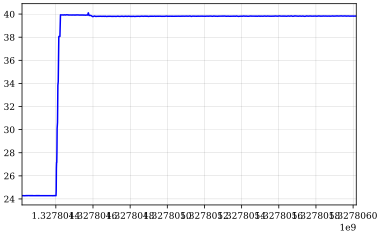

In [3]:
plt.plot(Pin[:,0], Pin[:,1]);
Pin[:,1].shape

In [4]:
Pin[:,1][:150].mean(), Pin[:,1][600:].mean()

(24.285888378620147, 39.82234170456727)

In [5]:
fn1 = "./L1_LSC_PRC_GAIN_MON-1327804218-1800.csv"
fn2 = "./L1_LSC_REFL_A_LF_OUTPUT-1327804218-1800.csv"
fn3 = "./L1_ASC_AS_C_SUM_OUTPUT-1327804218-1800.csv"
fn4 = "L1_LSC_REFL_A_LF_OUTPUT-1327804218-3720.csv"

PRC = pd.read_csv(fn1).dropna(axis=1).values
PREFL = pd.read_csv(fn2).dropna(axis=1).values
PREFLLong = pd.read_csv(fn4).dropna(axis=1).values

PAS = pd.read_csv(fn3).dropna(axis=1).values

In [6]:
PRC[:,1].shape

(1800,)

Before lock is 47.231882, after lock is 42.419288.


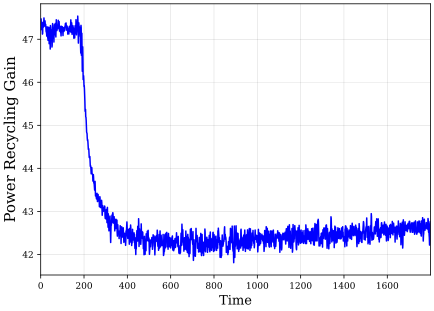

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(PRC[:,1])

ax.set_ylabel("Power Recycling Gain", fontsize=15)
ax.set_xlabel("Time", fontsize=13)

# fig.savefig('PRGDATA.pdf', bbox_inches='tight', dpi=120, pad_inches=0.01)

print(f"Before lock is {PRC[:,1][:150].mean():.6f}, after lock is {PRC[:,1][600:].mean():.6f}.")

Before lock is 1.328914 W, after lock is 1.533840 W.


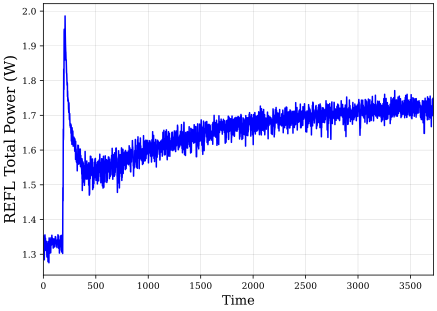

In [8]:
c1 = 1/3546*0.97 # calibration

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(PREFLLong[:,1]*c1)

ax.set_ylabel("REFL Total Power (W)", fontsize=15)
ax.set_xlabel("Time", fontsize=13)

# fig.savefig('REFLDATA.pdf', bbox_inches='tight', dpi=120, pad_inches=0.01)

print(f"Before lock is {PREFL[:,1][:150].mean()*c1:.6f} W, after lock is {PREFL[:,1][400:450].mean()*c1:.6f} W.")
# 3546 counts/0.97 W

Before the lock is 354.979505 mW, after lock is 533.404239 mW.


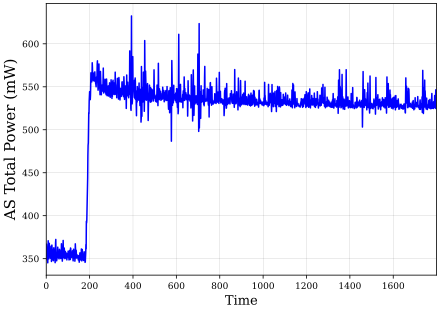

In [9]:
c2 = 1/140*22 # calibration

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(PAS[:,1]*c2)

ax.set_ylabel("AS Total Power (mW)", fontsize=15)
ax.set_xlabel("Time", fontsize=13)

# fig.savefig('ASDATA.pdf', bbox_inches='tight', dpi=120, pad_inches=0.01)

print(f"Before the lock is {PAS[:,1][:150].mean()*c2:.6f} mW, after lock is {PAS[:,1][600:].mean()*c2:.6f} mW.")

# 140 counts/22 mW

In [6]:
fn1 = "./L1_ASC_AS_C_SUM_OUTPUT-1326151818-35000.csv"
fn2 = "./L1_LSC_PRC_GAIN_MON-1326151818-35000.csv"
fn3 = "./L1_LSC_REFL_A_LF_OUTPUT-1326151818-35000.csv"

PAS = pd.read_csv(fn1).dropna(axis=1).values
PRC = pd.read_csv(fn2).dropna(axis=1).values
PRefl = pd.read_csv(fn3).dropna(axis=1).values

PRefl.shape

(35000, 2)

Before lock is 43.343809, after lock is 42.881366.
The mean is 42.88136600768566
The std is 0.04070481978234591
The range is (42.840661187903315, 42.92207082746801)


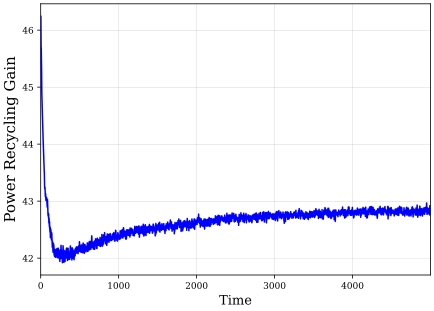

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(PRC[:5000,1])

ax.set_ylabel("Power Recycling Gain", fontsize=15)
ax.set_xlabel("Time", fontsize=13)

# fig.savefig('PRGDATA.pdf', bbox_inches='tight', dpi=120, pad_inches=0.01)

print(f"Before lock is {PRC[:,1][:150].mean():.6f}, after lock is {PRC[:,1][-10000:].mean():.6f}.")

mean, std = norm.fit(PRC[:,1][-10000:])
print(f"The mean is {mean}")
print(f"The std is {std}")
print(f"The range is {mean-std, mean+std}")

In [ ]:
mean,std=norm.fit(data)

In [5]:
1/3546*0.97, 1/3236

(0.0002735476593344614, 0.00030902348578491963)

In [12]:
(2.04-1.81)/1.81

0.12707182320441987

Before lock is 1.834791 W, after lock 2.005094 W.
The mean is 2.0050941293242484
The std is 0.008053132603347984
The range is (1.9970409967209004, 2.0131472619275965)


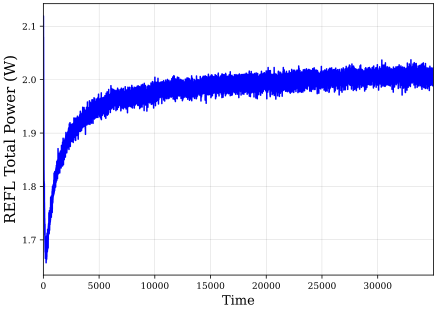

In [20]:
# c1 = 1/3546*0.97 # calibration
# c1 = 1/3236
c1 = 2/6600

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(PRefl[:,1]*c1)

ax.set_ylabel("REFL Total Power (W)", fontsize=15)
ax.set_xlabel("Time", fontsize=13)

# fig.savefig('REFLDATA.pdf', bbox_inches='tight', dpi=120, pad_inches=0.01)

print(f"Before lock is {PRefl[:,1][:150].mean()*c1:.6f} W, after lock {PRefl[:,1][-10000:].mean()*c1:.6f} W.")
# 3546 counts/0.97 W

mean, std = norm.fit(PRefl[:,1][-10000:])
print(f"The mean is {mean*c1}")
print(f"The std is {std*c1}")
print(f"The range is {mean*c1-std*c1, mean*c1+std*c1}")

Before lock is 543.058458 mW, after lock is 512.813663 mW.
The mean is 512.8136626395307
The std is 1.0023185002705728
The range is (511.8113441392601, 513.8159811398012)


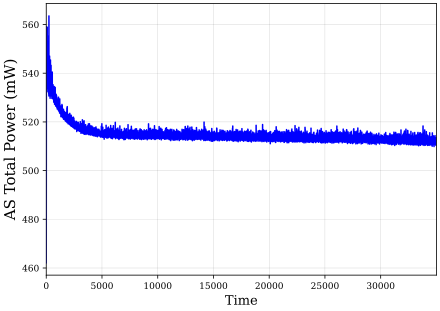

In [19]:
c2 = 1/140*22 # calibration

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(PAS[:,1]*c2)

ax.set_ylabel("AS Total Power (mW)", fontsize=15)
ax.set_xlabel("Time", fontsize=13)

# fig.savefig('ASDATA.pdf', bbox_inches='tight', dpi=120, pad_inches=0.01)

print(f"Before lock is {PAS[:,1][:150].mean()*c2:.6f} mW, after lock is {PAS[:,1][-10000:].mean()*c2:.6f} mW.")

# 140 counts/22 mW

mean, std = norm.fit(PAS[:,1][-10000:])
print(f"The mean is {mean*c2}")
print(f"The std is {std*c2}")
print(f"The range is {mean*c2-std*c2, mean*c2+std*c2}")